# Problem set 1: Intertemporal choice

### Q1

(a)

In class a formula was given relating α1 to the variance of transitory and permanent shocks:
$$\alpha_1 = \sigma^{2}_{p} / (\sigma^{2}_{p} + \sigma^{2}_{\epsilon})$$
Where $\sigma^{2}_{p}$ is the variance of permanent income and $sigma^{2}_{\epsilon}$ is the variance of transitory shocks to income. If $\sigma^{2}_{p}$ is the same for farmers and non-farmers, then because $sigma^{2}_{\epsilon}$ is greater for farmers, $\alpha_{1, farmers}$ should be less than $\alpha_{1, workers}$. However, the question provided no information about whether $\sigma^{2}_{p, farmers}$ is larger or smaller than$\sigma^{2}_{p, workers}$, so purely on the basis of the information provided in the question it is not possible to know whether $\alpha_{1, farmers}$ will be greater than or less than (or equal to) $\alpha_{1, workers}$.

In [1]:
# Initial imports and notebook setup
import sys 
import os
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats


#import the things we need from HARK
from HARK.ConsumptionSaving.ConsIndShockModel import * #import everything from the consindshockmodel
import HARK.ConsumptionSaving.ConsumerParameters as Params #import the built in parameters for the consumer
from HARK.utilities import plotFuncsDer, plotFuncs #import some things that allow us to plot functions more easily
from time import clock
mystr = lambda number : "{:.4f}".format(number)

In [2]:
# This cell defines a parameter dictionary for the consumer type 'Perfect Foresight' in HARK.
# We then solve the Perfect Foresight consumer's  problem, and extract the consumption function,
# which will give us the consumption function Friedman proposed.

PF_dictionary = {
    'CRRA': 2.5,          # The dictionary includes our original parameters...
    'Rfree': 1.,
    'DiscFac': 1.,
    'LivPrb': [1.0],
    'PermGroFac': [1.0],
    'PermShkStd': [0.],  # no permanent shocks for our agent...    
    'PermShkCount': 1.,
    'TranShkStd': [0.],
    'TranShkCount': 0,
    'UnempPrb': 0.0,
    'IncUnemp': 0.,
    'BoroCnstArt': 0.0,
    'aXtraMin': 0.001,    # aXtra parameters specify how to construct the grid of assets.
    'aXtraMax': 0.5,      # Don't worry about these for now
    'aXtraNestFac': 3,
    'aXtraCount': 0,
    'aXtraExtra': [None],
    'vFuncBool': False,   # These booleans indicate whether the value function should be calculated
    'CubicBool': False,   # and whether to use cubic spline interpolation. You can ignore them.
    'aNrmInitMean' : 0.,
    'aNrmInitStd' : 0.0,  # These parameters specify the (log) distribution of normalized assets
    'pLvlInitMean' : 1.5, # and permanent income for agents at "birth". They are only relevant in
    'pLvlInitStd' : 0.,  # simulation and you don't need to worry about them.
    'PermGroFacAgg' : 0.,
    'T_retire': 0,        
    'UnempPrbRet': 0.0,   
    'IncUnempRet': 0.0, 
    'T_age' : None,
    'T_cycle' : 1,
    'cycles' : 0, #consumer is infinitely lived
    'AgentCount': 1,
    'tax_rate':0.0,
}

PFexample = PerfForesightConsumerType(**PF_dictionary) 
# the asterisks ** basically say "here come some arguments" to PerfForesightConsumerType

PFexample.solve() #this solves the consumer's problem
PFexample.unpackcFunc() #this then extracts their consumption function

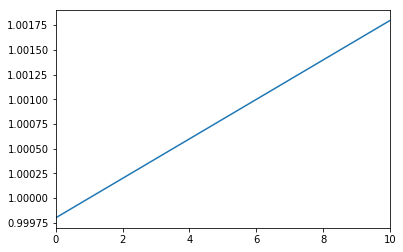

In [3]:
#Lets check that our consumption function is of 'Friedman rule' form
#It should be a straight horizontal line at 1

#Using the plotFuncs function
plotFuncs(PFexample.solution[0].cFunc,0.,10.0)

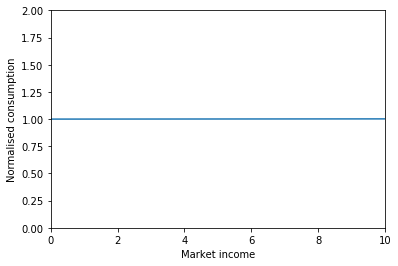

In [4]:
# At first glance this doesn't look very horizontal.
# Since we are approximating the function when we use HARK's .solve() function,
# we need to zoom out to see if the function looks similar to what we expect

inc_test = ((0., 5., 10.)) #pick a bunch of points to plot

cons_nrm = PFexample.solution[0].cFunc(inc_test)
plt.plot(inc_test, cons_nrm)
plt.xlim(0, 10)
plt.ylim(0, 2)
plt.xlabel('Market income')
plt.ylabel('Normalised consumption')
plt.show() #we can see that they are consuming their permanent income (normalised to 1), regardless of their market income

In [5]:
# This looks much better

(i) <br>
$\sigma^{2}_{p, farmers} = \sigma^{2}_{p, workers} = 0.01$
<br>
$\sigma^{2}_{\epsilon, farmers} = 3\sigma^{2}_{\epsilon, workers} = 0.06$

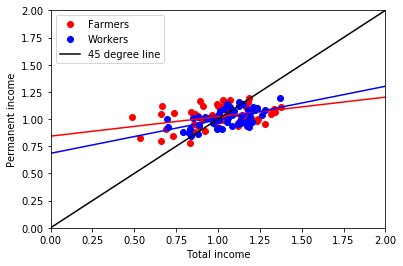

In [6]:
perm_inc_farm = np.random.normal(1, np.sqrt(0.01), 50) #set the permanent income for farmers
perm_inc_work =  np.random.normal(1, np.sqrt(0.01), 50) #set the permanent income for workers

trans_inc_farm = np.random.normal(0, np.sqrt(0.06), 50) #set the transitory income for farmers
trans_inc_work = np.random.normal(0, np.sqrt(0.02), 50) #set the transitory income for workers

total_inc_farm = perm_inc_farm + trans_inc_farm
total_inc_work = perm_inc_work + trans_inc_work

#get lines of best fit
slope_farm, intercept_farm, r_value_farm, p_value_farm, std_err_farm = stats.linregress(total_inc_farm, perm_inc_farm)
line_farm = slope_farm*np.linspace(0, 2, 20) + intercept_farm
slope_work, intercept_work, r_value_work, p_value_work, std_err_work = stats.linregress(total_inc_work, perm_inc_work)
line_work = slope_work*np.linspace(0, 2, 20) + intercept_work

plt.plot(total_inc_farm, PFexample.solution[0].cFunc(total_inc_farm)*perm_inc_farm, 'ro', label = 'Farmers') #plot farmers
plt.plot(total_inc_work, PFexample.solution[0].cFunc(total_inc_work)*perm_inc_work, 'bo', label = 'Workers') #plot workers
plt.plot(np.linspace(0, 2, 20), line_farm, 'r-') #plot line of best fit
plt.plot(np.linspace(0, 2, 20), line_work, 'b-') #plot line of best fit
plt.plot((0, 2), (0, 2), 'k-', label = '45 degree line') #plot 45 degree line
plt.legend(loc='upper left')
plt.xlim(0, 2)
plt.ylabel('Permanent income')
plt.xlabel('Total income')
plt.ylim(0, 2)
plt.show() #show chart

(ii) <br>
$\sigma^{2}_{p, farmers} = 10\sigma^{2}_{p, workers} = 0.1$
<br>
$\sigma^{2}_{\epsilon, farmers} = 3\sigma^{2}_{\epsilon, workers} = 0.06$

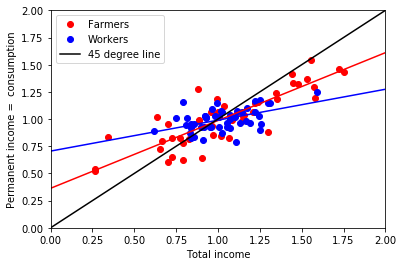

In [7]:
perm_inc_farm = np.random.normal(1, np.sqrt(0.1), 50) #set the permanent income for farmers
perm_inc_work =  np.random.normal(1, np.sqrt(0.01), 50) #set the permanent income for workers

trans_inc_farm = np.random.normal(0, np.sqrt(0.06), 50) #set the transitory income for farmers
trans_inc_work = np.random.normal(0, np.sqrt(0.02), 50) #set the transitory income for workers

total_inc_farm = perm_inc_farm + trans_inc_farm
total_inc_work = perm_inc_work + trans_inc_work

#get lines of best fit
slope_farm, intercept_farm, r_value_farm, p_value_farm, std_err_farm = stats.linregress(total_inc_farm, perm_inc_farm)
line_farm = slope_farm*np.linspace(0, 2, 20) + intercept_farm
slope_work, intercept_work, r_value_work, p_value_work, std_err_work = stats.linregress(total_inc_work, perm_inc_work)
line_work = slope_work*np.linspace(0, 2, 20) + intercept_work

plt.plot(total_inc_farm, PFexample.solution[0].cFunc(total_inc_farm)*perm_inc_farm, 'ro', label = 'Farmers') #plot farmers
#Notice here we are plotting consumption on the x-axis. To do this we use the consumption function we unpacked before.
#We have to be careful though. cFunc takes in normalised market resources (i.e. divided by permanent income) and gives us
#normalised consumption. Therefore we multiply by permanent income to get the level of consumption.

plt.plot(total_inc_work, PFexample.solution[0].cFunc(total_inc_work)*perm_inc_work, 'bo', label = 'Workers') #plot workers
plt.plot(np.linspace(0, 2, 20), line_farm, 'r-') #plot line of best fit
plt.plot(np.linspace(0, 2, 20), line_work, 'b-') #plot line of best fit
plt.plot((0, 2), (0, 2), 'k-', label = '45 degree line') #plot 45 degree line
plt.legend(loc='upper left')
plt.xlim(0, 2)
plt.ylabel('Permanent income =  consumption')
plt.xlabel('Total income')
plt.ylim(0, 2)
plt.show() #show chart

(iii) <br>
$\sigma^{2}_{p, farmers} = 0.1\sigma^{2}_{p, workers} = 0.001$
<br>
$\sigma^{2}_{\epsilon, farmers} = 3\sigma^{2}_{\epsilon, workers} = 0.06$

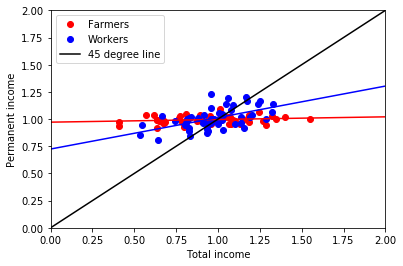

In [8]:
perm_inc_farm = np.random.normal(1, np.sqrt(0.001), 50) #set the permanent income for farmers
perm_inc_work =  np.random.normal(1, np.sqrt(0.01), 50) #set the permanent income for workers

trans_inc_farm = np.random.normal(0, np.sqrt(0.06), 50) #set the transitory income for farmers
trans_inc_work = np.random.normal(0, np.sqrt(0.02), 50) #set the transitory income for workers

total_inc_farm = perm_inc_farm + trans_inc_farm
total_inc_work = perm_inc_work + trans_inc_work

#get lines of best fit
slope_farm, intercept_farm, r_value_farm, p_value_farm, std_err_farm = stats.linregress(total_inc_farm, perm_inc_farm)
line_farm = slope_farm*np.linspace(0, 2, 20) + intercept_farm
slope_work, intercept_work, r_value_work, p_value_work, std_err_work = stats.linregress(total_inc_work, perm_inc_work)
line_work = slope_work*np.linspace(0, 2, 20) + intercept_work

plt.plot(total_inc_farm, PFexample.solution[0].cFunc(total_inc_farm)*perm_inc_farm, 'ro', label = 'Farmers') #plot farmers
plt.plot(total_inc_work, PFexample.solution[0].cFunc(total_inc_work)*perm_inc_work, 'bo', label = 'Workers') #plot workers
plt.plot(np.linspace(0, 2, 20), line_farm, 'r-') #plot line of best fit
plt.plot(np.linspace(0, 2, 20), line_work, 'b-') #plot line of best fit
plt.plot((0, 2), (0, 2), 'k-', label = '45 degree line') #plot 45 degree line
plt.legend(loc='upper left')
plt.xlim(0, 2)
plt.xlabel('Total income')
plt.ylabel('Permanent income')
plt.ylim(0, 2)
plt.show() #show chart

In the first chart, where the blue line represents the estimated consumption function for workers and red represents estimated consumption function for farmers. The $\sigma^{2}_{p}$ is assumed the same for farmers and non-farmers, but the variance of the transitory shock differs: $\sigma^{2}_{\epsilon}$ for farmers is higher than that of hte workers. The simulations confirm that the MPC for workers is larger than the MPC for farmers (i.e. the blueline is steeper).The other figures similarly support the intuition behind Friedman’s result.

(b)

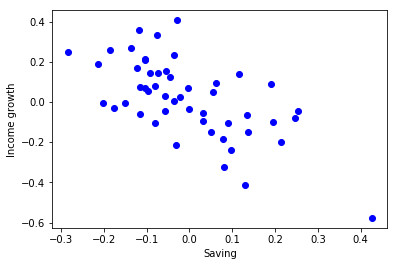

In [9]:
# Lets construct permanent income first, this doesn't change over the two periods
perm_inc = np.random.normal(1, np.sqrt(0.01), 50)

# Now lets construct total income. We have 50 houses and two periods
total_inc_1 = perm_inc + np.random.normal(0, np.sqrt(0.02), 50) #total income in period 1
total_inc_2 = perm_inc + np.random.normal(0, np.sqrt(0.02), 50) #total income in period 2 (note transitory shocks are independent)

#T o find saving in period 1, we need to do total income minus consumption
saving_1 = total_inc_1 - PFexample.solution[0].cFunc(total_inc_1)*perm_inc

#F ind income growth
inc_growth = total_inc_2 - total_inc_1 #find growth of income

# Now create the plot
plt.plot(saving_1, inc_growth, 'bo')
plt.xlabel('Saving')
plt.ylabel('Income growth')
plt.show()

Think of a household which experienced a negative transitory shock in period t of amount $\epsilon$, i.e. $y_{t,i} = p_i −\epsilon$. That household would have a negative saving rate in period t, according to Friedman’s PIH. Furthermore, in period t + 1 that household’s income is expected to be $E_t[y_{t+1, i}] = p_i > y_{t, i} = p_i - \epsilon_{t, i}$ so expected income growth is positive. A similar argument demonstrates that households with positive saving rates in period t should expect negative income growth between t and t+1. The conclusion is that there should be a negative correlation between the saving rate in period t and the growth rate of income between t and t + 1. 

The next figure plots the simulated saving rate and income growth rate in next period. Overall, we observe a negative correlation between the saving rate in period t and the growth rate of income between t and t + 1. A closer look at the figure reveals that this is not always the case, however. For instance, if the household after a negative transitory shock suffers from another more severe negative transitory shock, then the realized income growth may be negative, although the expected income growth is positive.

(c)

According to the PIH, changing withholding rates should have no effect on consumption if the total tax burden is unchanged. Any sensible definition of “transitory” versus “permanent” effects on income would have to classify a change in withholding schedules as having a “transitory” effect on income, since whatever the change in take-home pay is today, come April 15th that change will be exactly offset. One minor caveat: it is true that consumers now got to earn interest on the money that would have been in the government’s hands if not for the change in the withholding rate, so perhaps a very small increase in consumption would be justifiable.